In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv('train_dataset_cleaned.csv', encoding='utf_16', index_col='Registration_Number')
df = data_raw.copy()

df.head()

,Annual_Turnover,Cuisine,City,Restaurant_Location,Opening_Day_of_Restaurant,Facebook_Popularity_Quotient,Endorsed_By,Instagram_Popularity_Quotient,Fire_Audit,Liquor_License_Obtained,...,Live_Music_Rating,Comedy_Gigs_Rating,Value_Deals_Rating,Live_Sports_Rating,Ambience,Lively,Service,Comfortablility,Privacy,State
Registration_Number,,,,,,,,,,,,,,,,,,,,,
60001,42000000,"indian,irish",Bangalore,Near Business Hub,2009-02-14,84.3,Not Specific,95.8,True,True,...,4.0,NaN,NaN,NaN,8.0,8,6,6,6,Karnataka
60002,50000000,"indian,irish",Indore,Near Party Hub,2008-09-29,85.4,Tier A Celebrity,85.0,True,True,...,NaN,4.0,NaN,NaN,5.0,7,7,3,8,Madhya Pradesh
60003,32500000,"tibetan,italian",Chennai,Near Business Hub,2011-07-30,85.0,Tier A Celebrity,68.2,True,True,...,3.0,NaN,NaN,NaN,7.0,10,5,2,8,Tamil Nadu
60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,2008-11-30,85.6,Tier A Celebrity,83.6,False,True,...,6.0,NaN,NaN,NaN,7.0,7,4,3,5,Haryana
60005,20000000,"irish,belgian",Manesar,Near Party Hub,2010-02-22,NaN,Tier A Celebrity,76.8,True,True,...,NaN,2.0,NaN,NaN,NaN,6,2,4,6,Haryana


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3493 entries, 60001 to 63493
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual_Turnover                3493 non-null   int64  
 1   Cuisine                        3493 non-null   object 
 2   City                           3493 non-null   object 
 3   Restaurant_Location            3493 non-null   object 
 4   Opening_Day_of_Restaurant      3493 non-null   object 
 5   Facebook_Popularity_Quotient   3394 non-null   float64
 6   Endorsed_By                    3493 non-null   object 
 7   Instagram_Popularity_Quotient  3437 non-null   float64
 8   Fire_Audit                     3493 non-null   bool   
 9   Liquor_License_Obtained        3493 non-null   bool   
 10  Situated_in_a_Multi_Complex    3493 non-null   bool   
 11  Dedicated_Parking              3493 non-null   bool   
 12  Open_Sitting_Available         3493 non-null   b

Jot down thoughts:

- **Registration_Number** is the index column
- **Open_Date_of_Restaurant** should be a datetime column. However, for usefulness, we will convert it into number of days opened so far (use today as the cutoff date, so the number of days opened will be the difference between today and the date the restaurant was opened)
- Need to look at Restaurant_Tier, Restaurant_City_Tier
- Value_Deals_Rating and Live_Sports_Rating might not be useful, as there are simply too many missing values. Same as Comedy_Gigs_Rating
- Annual_Turnover is our Y column (dependent variable)
- Both Cuisine and City can be multiple values, so we need to split them up
- Since there are too many cities, we now group them using the State column instead. the City column will be ignored in the training

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual_Turnover,3493.0,3.072571e+07,2.165125e+07,3500000.0,18000000.0,30000000.00,3.700000e+07,4.000000e+08
Facebook_Popularity_Quotient,3394.0,7.793872e+01,9.829169e+00,43.0,72.0,79.00,8.574500e+01,9.776000e+01
Instagram_Popularity_Quotient,3437.0,7.440468e+01,1.094033e+01,40.0,66.0,74.05,8.240000e+01,9.870000e+01
Resturant_Tier,3444.0,1.926539e+00,2.609297e-01,1.0,2.0,2.00,2.000000e+00,2.000000e+00
Restaurant_Zomato_Rating,3493.0,2.696536e+00,7.872713e-01,0.0,2.0,3.00,3.000000e+00,5.000000e+00
Order_Wait_Time,3493.0,5.509591e+00,2.854476e+00,1.0,3.0,5.00,8.000000e+00,1.000000e+01
Staff_Responsivness,3493.0,4.538506e+00,1.093832e+00,1.0,4.0,5.00,5.000000e+00,8.000000e+00
Value_for_Money,3493.0,4.526482e+00,9.139370e-01,1.0,4.0,5.00,5.000000e+00,7.000000e+00
Hygiene_Rating,3493.0,4.661895e+00,1.259523e+00,1.0,4.0,5.00,6.000000e+00,9.000000e+00
Food_Rating,3493.0,7.522760e+00,1.722721e+00,5.0,6.0,7.00,9.000000e+00,1.000000e+01


In [5]:
# Get a list of distinct States, with any value having a comma splitted into a list
states = df['State'].str.split(',').str[0].unique()
states

array(['Karnataka', 'Madhya Pradesh', 'Tamil Nadu', 'Haryana',
       'Telangana', 'Uttar Pradesh', 'West Bengal', 'Maharashtra',
       'Unknown', 'Punjab', 'Delhi', 'Odisha', 'Rajasthan', 'Gujarat',
       'Kerala', 'Jharkhand', 'Himachal Pradesh', 'Daman and Diu',
       'Andhra Pradesh', 'Bihar', 'Chhattisgarh', 'Uttarakhand',
       'Chandigarh', 'Meghalaya', 'Puducherry', 'Jammu and Kashmir'],
      dtype=object)

We eventually will use this State list to get the state dummy columns. At that point, we will remove "Unknown" as the dummy variable to be dropped for training.

In [6]:
# Get a list of distinct Cuisine, with any value having a comma splitted into a list
cuisines = df['Cuisine'].str.split(',').str[0].unique()
cuisines

array(['indian', 'tibetan', 'turkish', 'irish', 'chinese', 'algerian',
       'welsh', 'peruvian', 'japanese', 'british', 'nigerian', 'polish',
       'cuban', 'swedish', 'hawaiian'], dtype=object)

Time to do some fill-up. Get a list of variables that have missing values (and the count). The list should exclude any column that does not have missing value.

In [7]:
# Get a list of columns that have missing values
missing_cols = df.columns[df.isnull().any()]
missing_cols.to_numpy()

array(['Facebook_Popularity_Quotient', 'Instagram_Popularity_Quotient',
       'Resturant_Tier', 'Overall_Restaurant_Rating', 'Live_Music_Rating',
       'Comedy_Gigs_Rating', 'Value_Deals_Rating', 'Live_Sports_Rating',
       'Ambience'], dtype=object)

In [8]:
df.isnull().sum()

Annual_Turnover                     0
Cuisine                             0
City                                0
Restaurant_Location                 0
Opening_Day_of_Restaurant           0
Facebook_Popularity_Quotient       99
Endorsed_By                         0
Instagram_Popularity_Quotient      56
Fire_Audit                          0
Liquor_License_Obtained             0
Situated_in_a_Multi_Complex         0
Dedicated_Parking                   0
Open_Sitting_Available              0
Resturant_Tier                     49
Restaurant_Type                     0
Restaurant_Theme                    0
Restaurant_Zomato_Rating            0
Restaurant_City_Tier                0
Order_Wait_Time                     0
Staff_Responsivness                 0
Value_for_Money                     0
Hygiene_Rating                      0
Food_Rating                         0
Overall_Restaurant_Rating         212
Live_Music_Rating                 765
Comedy_Gigs_Rating               2483
Value_Deals_

Let's plot them to see the distribution of the missing values

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


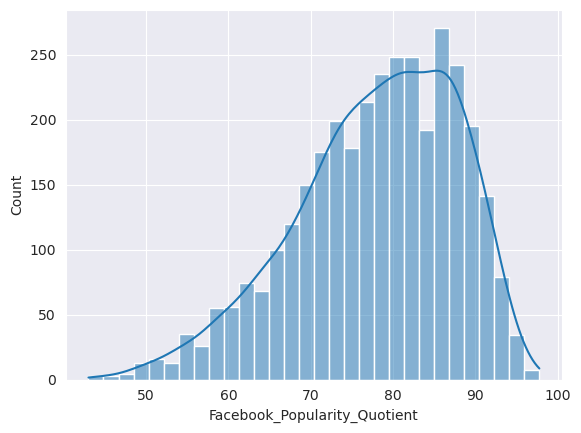

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


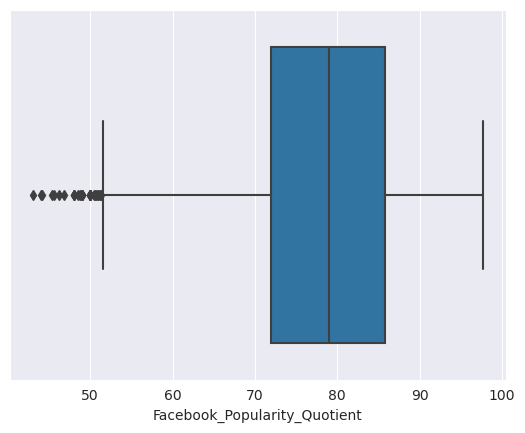

In [9]:
# Facebook_Popularity_Quotient - let's see the distribution right now
sns.histplot(data=df, x='Facebook_Popularity_Quotient', kde=True)
plt.show()
sns.boxplot(data=df, x='Facebook_Popularity_Quotient')
plt.show()

In [10]:
# check with median again
df.Facebook_Popularity_Quotient.describe()

count    3394.000000
mean       77.938715
std         9.829169
min        43.000000
25%        72.000000
50%        79.000000
75%        85.745000
max        97.760000
Name: Facebook_Popularity_Quotient, dtype: float64

In [11]:
# fill up the missing values with median
df.Facebook_Popularity_Quotient.fillna(df.Facebook_Popularity_Quotient.median(), inplace=True)

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


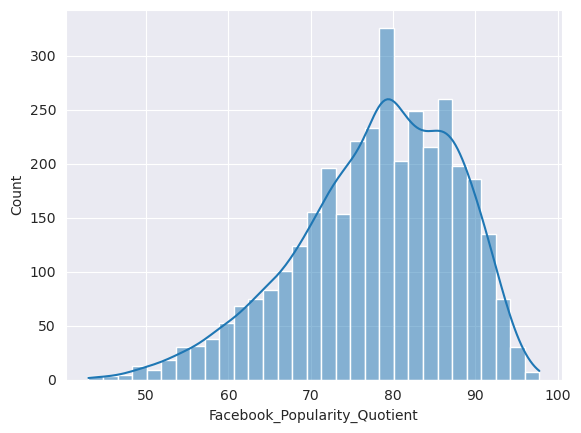

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


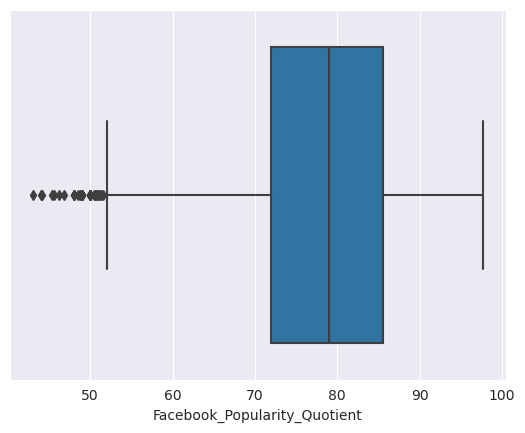

In [12]:
# check plots again
sns.histplot(data=df, x='Facebook_Popularity_Quotient', kde=True)
plt.show()
sns.boxplot(data=df, x='Facebook_Popularity_Quotient')
plt.show()

In [13]:
# check with median again
df.Facebook_Popularity_Quotient.describe()

count    3493.000000
mean       77.968795
std         9.690437
min        43.000000
25%        72.000000
50%        79.000000
75%        85.600000
max        97.760000
Name: Facebook_Popularity_Quotient, dtype: float64

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


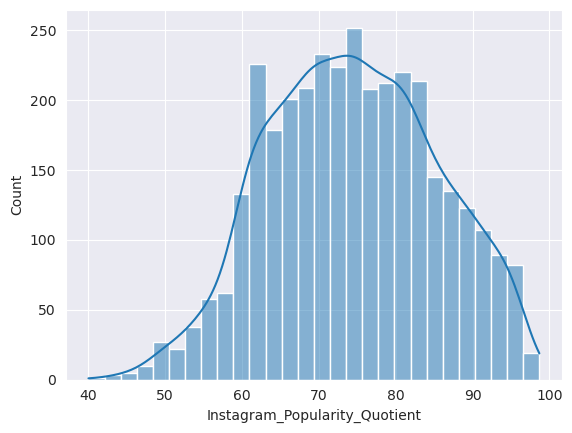

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


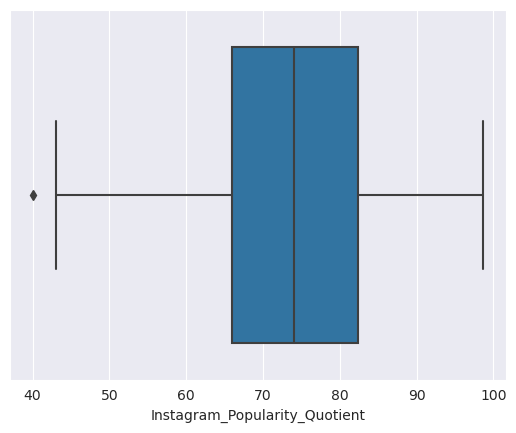

In [14]:
# Instagram Popularity Quotient
sns.histplot(data=df, x='Instagram_Popularity_Quotient', kde=True)
plt.show()
sns.boxplot(data=df, x='Instagram_Popularity_Quotient')
plt.show()

In [15]:
df.Instagram_Popularity_Quotient.describe()

count    3437.000000
mean       74.404684
std        10.940327
min        40.000000
25%        66.000000
50%        74.050000
75%        82.400000
max        98.700000
Name: Instagram_Popularity_Quotient, dtype: float64

In [16]:
# fill up missing value with mean
df.Instagram_Popularity_Quotient.fillna(df.Instagram_Popularity_Quotient.mean(), inplace=True)
df.Instagram_Popularity_Quotient.describe()

count    3493.000000
mean       74.404684
std        10.852249
min        40.000000
25%        66.400000
50%        74.400000
75%        82.200000
max        98.700000
Name: Instagram_Popularity_Quotient, dtype: float64

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


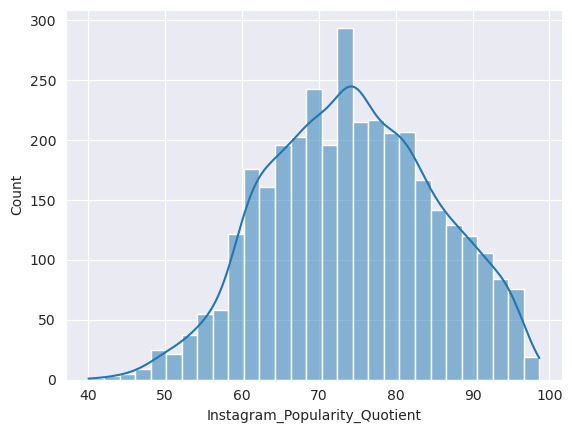

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


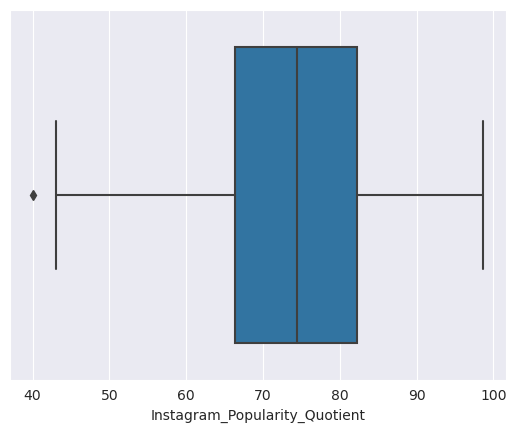

In [17]:
# Instagram Popularity Quotient
sns.histplot(data=df, x='Instagram_Popularity_Quotient', kde=True)
plt.show()
sns.boxplot(data=df, x='Instagram_Popularity_Quotient')
plt.show()

In [18]:
# restaurant tier - let's see its unique value set
df.Resturant_Tier.unique()

array([ 2.,  1., nan])

So this one actually seems like categorical data. Let's plot a count plot to see the distribution

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Resturant_Tier', ylabel='count'>

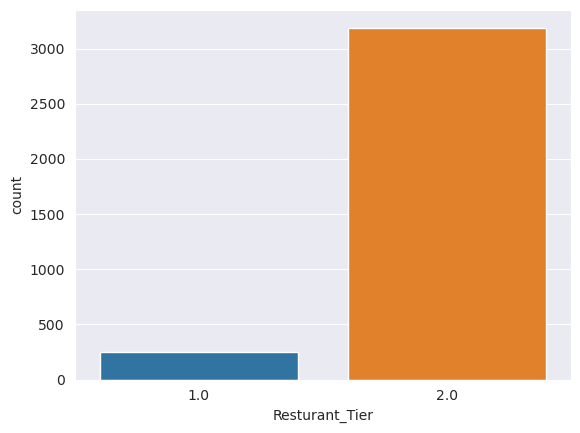

In [19]:
sns.countplot(data=df, x='Resturant_Tier')

In [20]:
# fill up missing value with mode
df.Resturant_Tier.fillna(df.Resturant_Tier.mode()[0], inplace=True)
df.Resturant_Tier.describe()

count    3493.000000
mean        1.927569
std         0.259237
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Resturant_Tier, dtype: float64

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Resturant_Tier', ylabel='count'>

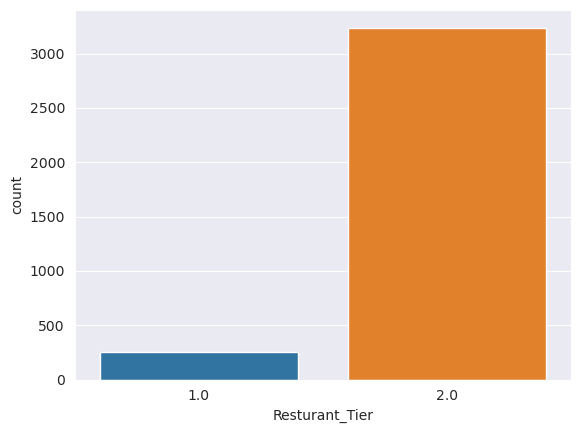

In [21]:
sns.countplot(data=df, x='Resturant_Tier')

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


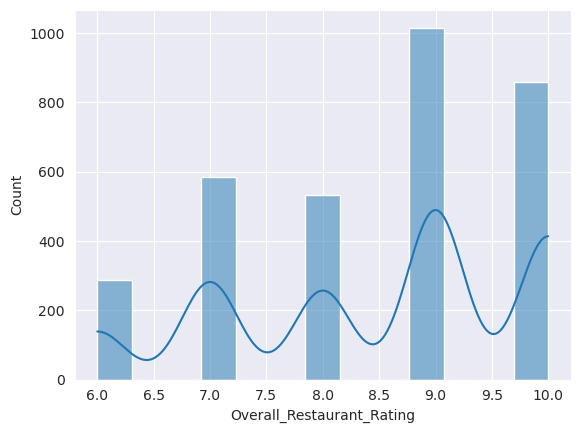

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


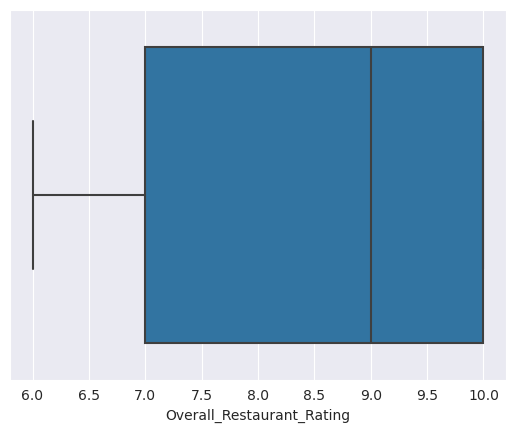

In [22]:
# Overall_Restaurant_Rating
sns.histplot(data=df, x='Overall_Restaurant_Rating', kde=True)
plt.show()
sns.boxplot(data=df, x='Overall_Restaurant_Rating')
plt.show()

In [23]:
df.Overall_Restaurant_Rating.describe()

count    3281.000000
mean        8.479427
std         1.287233
min         6.000000
25%         7.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: Overall_Restaurant_Rating, dtype: float64

Treat it as categorical - in this case, we will fill up the missing values with the mode

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Overall_Restaurant_Rating', ylabel='count'>

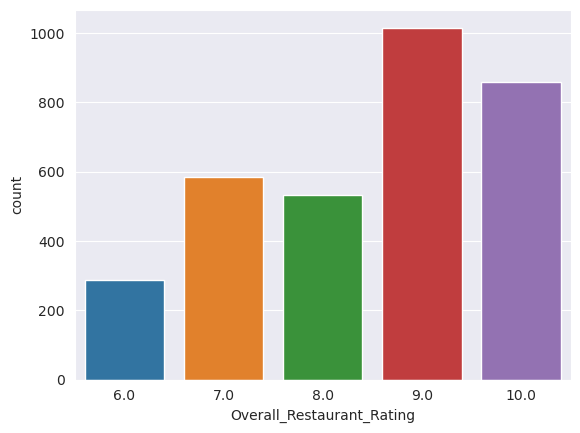

In [24]:
sns.countplot(data=df, x='Overall_Restaurant_Rating')

In [25]:
df.Overall_Restaurant_Rating.fillna(df.Overall_Restaurant_Rating.median(), inplace=True)

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Overall_Restaurant_Rating', ylabel='count'>

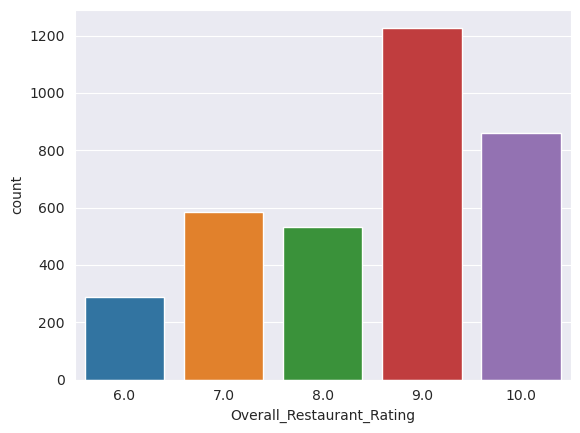

In [26]:
sns.countplot(data=df, x='Overall_Restaurant_Rating')

Restaurant_Theme - let's see its unique value set

In [27]:
df.Restaurant_Theme.unique()

array(['Arabian', 'Greek', "90's", 'Nature', 'Parsi', 'English',
       'Chinese', 'Delicio', 'Molino', 'Petit', 'Downtown', 'Italica',
       'Bettaso', 'Bakery', 'Mise En', 'Umami', 'Moonrise', 'Belise',
       'Cinnamon', 'Resca', 'TheGem', 'Benedicta', 'Marco', 'LaCuisine',
       'Spoon', 'Grand', 'Picante', 'Carbone', 'Flavors', 'Cafepro',
       'Savory', 'Piquant', 'Sage', 'Ambiance'], dtype=object)

In [28]:
df.Restaurant_Theme.value_counts()

Restaurant_Theme
Arabian      1373
Greek        1030
90's          584
Nature        179
Parsi         103
Chinese        74
Delicio        23
Molino         22
English        19
Belise         14
Downtown       10
Moonrise       10
Mise En         7
TheGem          6
Carbone         4
Petit           4
Marco           4
Umami           3
Benedicta       3
Picante         3
Bettaso         2
Resca           2
Savory          2
Cafepro         2
Sage            1
Piquant         1
Flavors         1
Grand           1
Cinnamon        1
Spoon           1
LaCuisine       1
Italica         1
Bakery          1
Ambiance        1
Name: count, dtype: int64

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


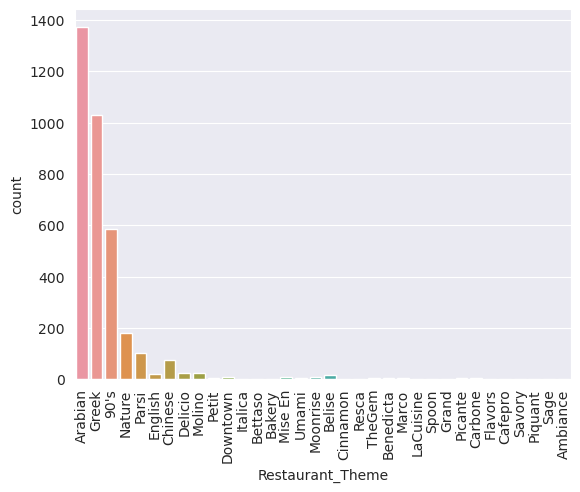

In [29]:
sns.countplot(data=df, x='Restaurant_Theme')
# rotate x label
plt.xticks(rotation=90)
plt.show()

In [30]:
# fill up missing value with mode
df.Restaurant_Theme.fillna(df.Restaurant_Theme.mode()[0], inplace=True)

In [31]:
# live music rating
df.Live_Music_Rating.isnull().sum()

765

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


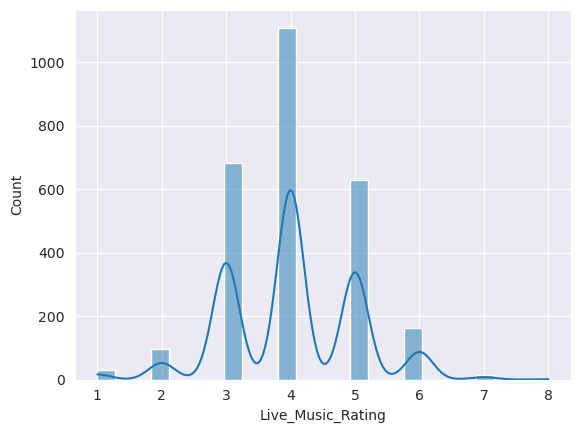

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


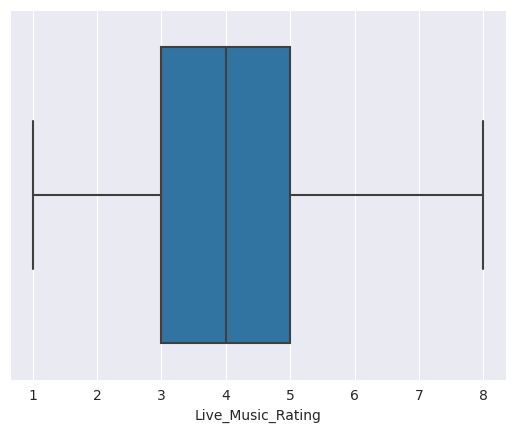

In [32]:
sns.histplot(data=df, x='Live_Music_Rating', kde=True)
plt.show()
sns.boxplot(data=df, x='Live_Music_Rating')
plt.show()

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Live_Music_Rating', ylabel='count'>

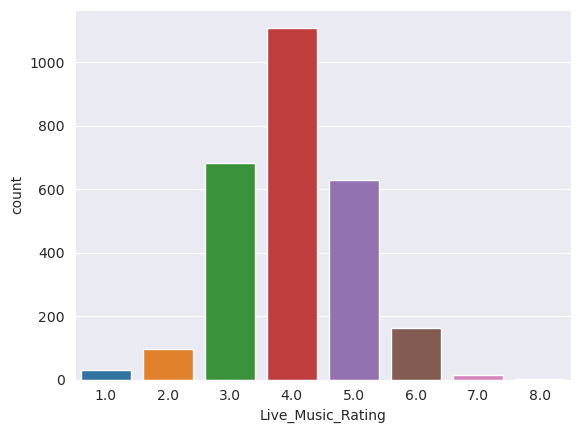

In [33]:
# count plot
sns.countplot(data=df, x='Live_Music_Rating')

In [34]:
# fill up missing value with median
df.Live_Music_Rating.fillna(df.Live_Music_Rating.median(), inplace=True)

In [35]:
# Comedy_Gigs_Rating
df.Comedy_Gigs_Rating.isnull().sum()

2483

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


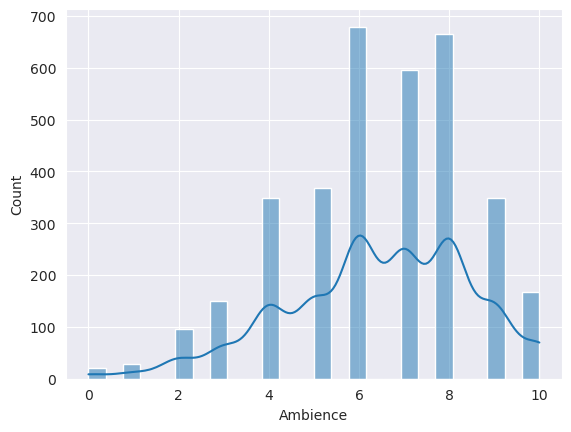

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


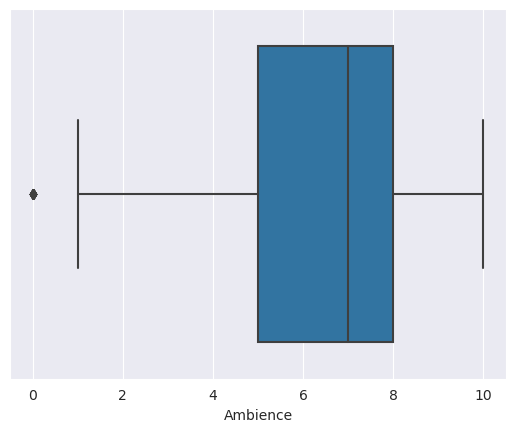

In [36]:
# Ambience
sns.histplot(data=df, x='Ambience', kde=True)
plt.show()
sns.boxplot(data=df, x='Ambience')
plt.show()

/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinlong/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Ambience', ylabel='count'>

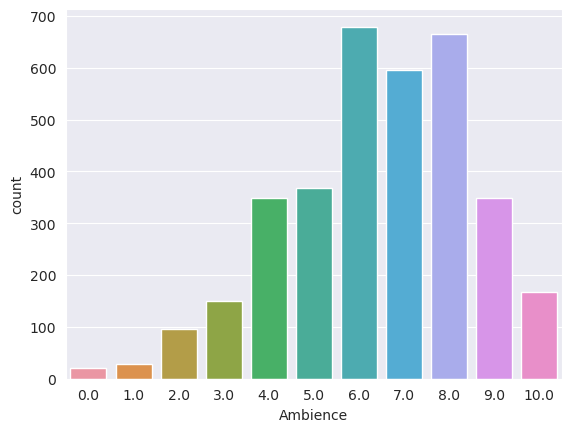

In [37]:
# count plot
sns.countplot(data=df, x='Ambience')

In [38]:
# fill up missing value with median
df.Ambience.fillna(df.Ambience.median(), inplace=True)